In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("C:/SOOKTAT/0. 프로젝트/Taxi/data/modeling_data.csv", nrows=1000_000)

train_df

,Unnamed: 0,fare_amount,passenger_count,log_date,log_time,log_hour,log_min,log_year,log_month,log_day,7to15,16to19,20to6,dayofweek,weekday,is_extracharge,taxi_amount,dist
0,0,4.5,1,2009-06-15,17:26:21,17,26,2009,6,15,0,1,0,1,1,1,1,412.061196
1,1,16.9,1,2010-01-05,16:52:16,16,52,2010,1,5,0,1,0,2,1,1,1,4646.229208
2,2,5.7,2,2011-08-18,00:35:00,0,35,2011,8,18,0,0,1,4,1,1,1,1004.797031
3,3,7.7,1,2012-04-21,04:30:42,4,30,2012,4,21,0,0,1,6,0,1,1,914.153776
4,4,5.3,1,2010-03-09,07:51:00,7,51,2010,3,9,1,0,0,2,1,0,1,1366.163592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,5.7,5,2011-01-14,13:55:00,13,55,2011,1,14,1,0,0,5,1,0,2,870.509800
999996,999996,10.5,1,2012-07-20,12:59:16,12,59,2012,7,20,1,0,0,5,1,0,1,2277.239678
999997,999997,6.5,1,2013-07-01,09:10:00,9,10,2013,7,1,1,0,0,1,1,0,1,628.284955
999998,999998,17.5,3,2013-09-24,23:28:00,23,28,2013,9,24,0,0,1,2,1,1,1,2803.616297


In [3]:
train_df = train_df.drop(columns = ['Unnamed: 0', 'log_date', 'log_time'])

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   fare_amount      1000000 non-null  float64
 1   passenger_count  1000000 non-null  int64  
 2   log_hour         1000000 non-null  int64  
 3   log_min          1000000 non-null  int64  
 4   log_year         1000000 non-null  int64  
 5   log_month        1000000 non-null  int64  
 6   log_day          1000000 non-null  int64  
 7   7to15            1000000 non-null  int64  
 8   16to19           1000000 non-null  int64  
 9   20to6            1000000 non-null  int64  
 10  dayofweek        1000000 non-null  int64  
 11  weekday          1000000 non-null  int64  
 12  is_extracharge   1000000 non-null  int64  
 13  taxi_amount      1000000 non-null  int64  
 14  dist             1000000 non-null  float64
dtypes: float64(2), int64(13)
memory usage: 114.4 MB


# xgboost

In [4]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.model_selection import train_test_split

X = train_df.drop(columns = ['fare_amount'])
y = train_df['fare_amount']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [6]:
dtrain = xgb.DMatrix(train_X, label =train_y)
dvalid = xgb.DMatrix(valid_X)

* learning_rate = 0.05

In [33]:
params = {
        'learning_rate': 0.05
    }

In [34]:
xgb_model = xgb.train(params, dtrain)

xgb_pred = xgb_model.predict(dvalid)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

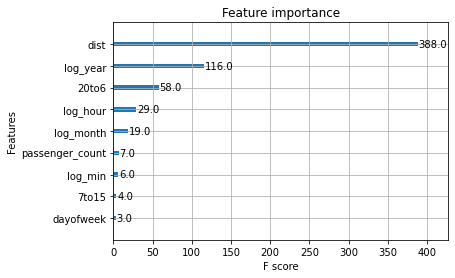

In [36]:
plot_importance(xgb_model)

In [41]:
MAE = mean_absolute_error(valid_y, xgb_pred)
MSE = mean_squared_error(valid_y, xgb_pred)

print('MAE = %.5f' % (MAE))
print('MSE = %.5f' % (MSE))

MAE = 6.53150
MSE = 92.79006


* learning_rate = 0.1, max_depth = 10

In [43]:
params = {
        'learning_rate': 0.1,
        'max_depth' : 10
    }

In [44]:
xgb_model = xgb.train(params, dtrain)

xgb_pred = xgb_model.predict(dvalid)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

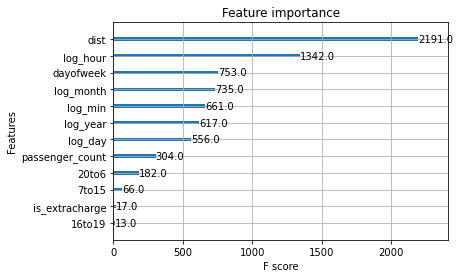

In [45]:
plot_importance(xgb_model)

In [46]:
MAE = mean_absolute_error(valid_y, xgb_pred)
MSE = mean_squared_error(valid_y, xgb_pred)

print('MAE = %.5f' % (MAE))
print('MSE = %.5f' % (MSE))

MAE = 4.02823
MSE = 48.67227


* max_depth = 10

In [47]:
params = {
        'max_depth' : 10
    }

In [48]:
xgb_model = xgb.train(params, dtrain)

xgb_pred = xgb_model.predict(dvalid)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

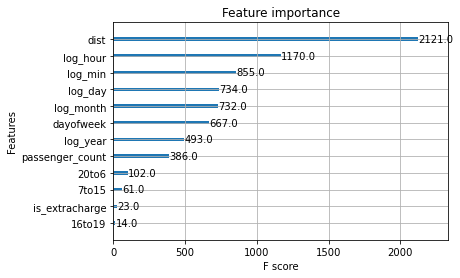

In [49]:
plot_importance(xgb_model)

In [50]:
MAE = mean_absolute_error(valid_y, xgb_pred)
MSE = mean_squared_error(valid_y, xgb_pred)

print('MAE = %.5f' % (MAE))
print('MSE = %.5f' % (MSE))

MAE = 2.79966
MSE = 26.22581


* max_depth = 10, lambda = 3, scale_pos_weight = 3

In [55]:
params = {
        'max_depth' : 10,
        'lambda' : 3,
        'scale_pos_weight' : 3
    }

In [56]:
xgb_model = xgb.train(params, dtrain)

xgb_pred = xgb_model.predict(dvalid)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

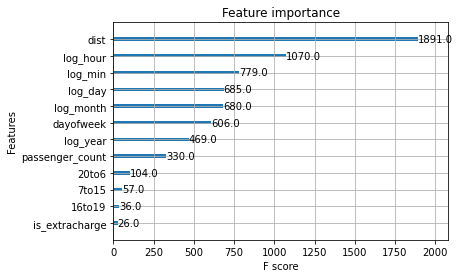

In [57]:
plot_importance(xgb_model)

In [58]:
MAE = mean_absolute_error(valid_y, xgb_pred)
MSE = mean_squared_error(valid_y, xgb_pred)

print('MAE = %.5f' % (MAE))
print('MSE = %.5f' % (MSE))

MAE = 2.79758
MSE = 26.11741


* max_depth = 5, lambda = 3, scale_pos_weight = 3

In [59]:
params = {
        'max_depth' : 5,
        'lambda' : 3,
        'scale_pos_weight' : 3
    }

In [60]:
xgb_model = xgb.train(params, dtrain)

xgb_pred = xgb_model.predict(dvalid)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

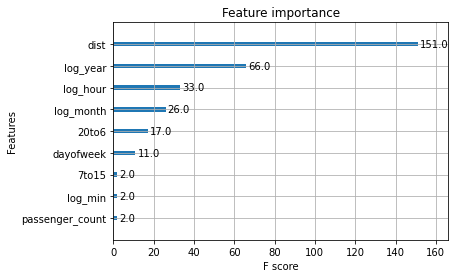

In [61]:
plot_importance(xgb_model)

In [62]:
MAE = mean_absolute_error(valid_y, xgb_pred)
MSE = mean_squared_error(valid_y, xgb_pred)

print('MAE = %.5f' % (MAE))
print('MSE = %.5f' % (MSE))

MAE = 2.82585
MSE = 26.31828


* max_depth = 13, lambda = 3, scale_pos_weight = 3

In [75]:
params = {
        'max_depth' : 13,
        'lambda' : 3,
        'scale_pos_weight' : 3
    }

In [76]:
xgb_model = xgb.train(params, dtrain)

xgb_pred = xgb_model.predict(dvalid)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

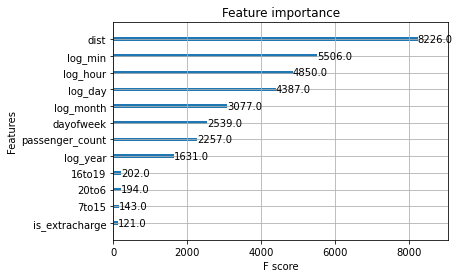

In [77]:
plot_importance(xgb_model)

In [78]:
MAE = mean_absolute_error(valid_y, xgb_pred)
MSE = mean_squared_error(valid_y, xgb_pred)

print('MAE = %.5f' % (MAE))
print('MSE = %.5f' % (MSE))

MAE = 2.81499
MSE = 26.76595


* max_depth = 7, lambda = 3, scale_pos_weight = 3

In [79]:
params = {
        'max_depth' : 7,
        'lambda' : 3,
        'scale_pos_weight' : 3
    }

In [80]:
xgb_model = xgb.train(params, dtrain)

xgb_pred = xgb_model.predict(dvalid)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

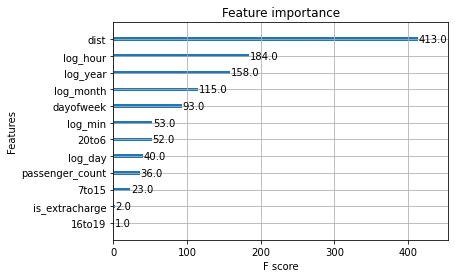

In [81]:
plot_importance(xgb_model)

In [82]:
MAE = mean_absolute_error(valid_y, xgb_pred)
MSE = mean_squared_error(valid_y, xgb_pred)

print('MAE = %.5f' % (MAE))
print('MSE = %.5f' % (MSE))

MAE = 2.80416
MSE = 26.01992


* max_depth = 7, lambda = 3, scale_pos_weight = 5 ; scale_pos_weight = 3일 때와 동일

* max_depth = 7, lambda = 5, scale_pos_weight = 3

In [89]:
params = {
        'max_depth' : 7,
        'lambda' : 5,
        'scale_pos_weight' : 3
    }

In [90]:
xgb_model = xgb.train(params, dtrain)

xgb_pred = xgb_model.predict(dvalid)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

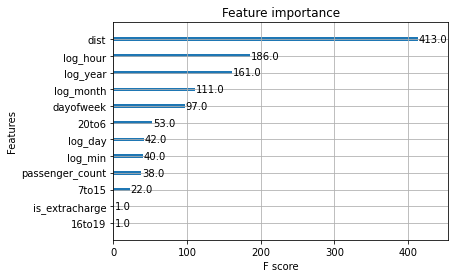

In [91]:
plot_importance(xgb_model)

In [92]:
MAE = mean_absolute_error(valid_y, xgb_pred)
MSE = mean_squared_error(valid_y, xgb_pred)

print('MAE = %.5f' % (MAE))
print('MSE = %.5f' % (MSE))

MAE = 2.80314
MSE = 25.94364


* max_depth = 7, lambda = 10, scale_pos_weight = 3

In [30]:
params = {
        'max_depth' : 7,
        'lambda' : 10,
        'scale_pos_weight' : 3
    }

In [31]:
xgb_model = xgb.train(params, dtrain)

xgb_pred = xgb_model.predict(dvalid)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

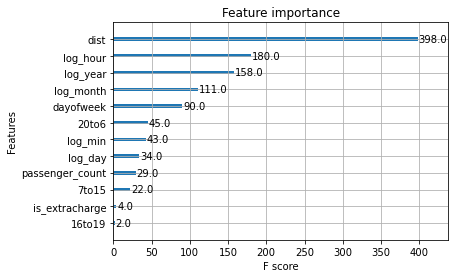

In [32]:
plot_importance(xgb_model)

In [33]:
MAE = mean_absolute_error(valid_y, xgb_pred)
MSE = mean_squared_error(valid_y, xgb_pred)

print('MAE = %.5f' % (MAE))
print('MSE = %.5f' % (MSE))

MAE = 2.80115
MSE = 25.91926


### test 데이터 셋에 적용

In [45]:
test_df = pd.read_csv("C:/SOOKTAT/0. 프로젝트/Taxi/data/test2.csv")

test_df

,Unnamed: 0,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,time,log_date,...,log_month,log_day,7to15,16to19,20to6,dayofweek,weekday,is_extracharge,taxi_amount,distance
0,0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,2015-01-27 13:08:24,2015-01-27,...,1,27,1,0,0,2,1,0,1,1094.593298
1,1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,2015-01-27 13:08:24,2015-01-27,...,1,27,1,0,0,2,1,0,1,1474.196242
2,2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,2011-10-08 11:53:44,2011-10-08,...,10,8,1,0,0,6,0,0,1,357.075676
3,3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,2012-12-01 21:12:12,2012-12-01,...,12,1,0,0,1,6,0,1,1,1150.115807
4,4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,2012-12-01 21:12:12,2012-12-01,...,12,1,0,0,1,6,0,1,1,2875.803386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9824,9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6,2015-05-10 12:37:51,2015-05-10,...,5,10,1,0,0,7,0,0,2,1484.303484
9825,9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6,2015-01-12 17:05:51,2015-01-12,...,1,12,0,1,0,1,1,1,2,1843.581309
9826,9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6,2015-04-19 20:44:15,2015-04-19,...,4,19,0,0,1,7,0,1,2,22663.426643
9827,9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6,2015-01-31 01:05:19,2015-01-31,...,1,31,0,0,1,6,0,1,2,5567.288310


In [46]:
test_df = test_df.drop(columns = ['Unnamed: 0', 'key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
                                   'dropoff_longitude', 'dropoff_latitude', 'time', 'log_date', 'log_time'])
test_df = test_df.rename(columns={'distance':'dist'})

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9829 entries, 0 to 9828
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  9829 non-null   int64  
 1   log_hour         9829 non-null   int64  
 2   log_min          9829 non-null   int64  
 3   log_year         9829 non-null   int64  
 4   log_month        9829 non-null   int64  
 5   log_day          9829 non-null   int64  
 6   7to15            9829 non-null   int64  
 7   16to19           9829 non-null   int64  
 8   20to6            9829 non-null   int64  
 9   dayofweek        9829 non-null   int64  
 10  weekday          9829 non-null   int64  
 11  is_extracharge   9829 non-null   int64  
 12  taxi_amount      9829 non-null   int64  
 13  dist             9829 non-null   float64
dtypes: float64(1), int64(13)
memory usage: 1.0 MB


In [48]:
dtest = xgb.DMatrix(test_df)

xgb_pred = xgb_model.predict(dtest)

xgb_pred

array([ 8.137362,  9.091423,  5.355594, ..., 53.342487, 18.61305 ,
        8.649694], dtype=float32)

### grid search .....

In [ ]:
from sklearn.model_selection import GridSearchCV

In [8]:
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor
 
def clf3():
    rfc = RandomForestRegressor()
    xg = XGBRegressor()
  
    return rfc, xg

In [17]:
rf_parameters ={'max_depth' : [3,4,7,10] ,
                'n_estimators': [3,4, 5,10],
                'random_state':[99]}

xg_parameters ={'max_depth' : [3,4,7,10] ,
                'n_estimators': [12,24,32],
                'learning_rate':[0.01, 0.1, 0.3, 0.5],
                'random_state':[99]}

In [12]:
import math
from sklearn.metrics import make_scorer

mse = make_scorer(mean_squared_error, greater_is_better=False)

In [14]:
from sklearn import model_selection
rfc, xg = clf3()

#RFC모델에 대한 grid search, scoring기준은 recall값으로, cross-validation은 10회 반복한다는 뜻임
grid_search_rf = model_selection.GridSearchCV (estimator = rfc, param_grid = rf_parameters,
                                               scoring = mse, cv = 5, n_jobs = -1)
 
grid_search_rf.fit(train_X, train_y)
#best hyper parameter값을 받음
best_rfc = grid_search_rf.best_estimator_
best_rfc

RandomForestRegressor(max_depth=10, n_estimators=10, random_state=99)

In [18]:
grid_search_xg = model_selection.GridSearchCV (estimator = xg, param_grid = xg_parameters,
                                               scoring = mse, cv = 5, n_jobs = -1)
grid_search_xg.fit(train_X, train_y)
best_xg = grid_search_xg.best_estimator_
best_xg

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=12, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=99,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [26]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor

rfr_model = rfr(max_depth=10, n_estimators=10, random_state=99)
rfr_model.fit(train_X, train_y)

rfr_pred = rfr_model.predict(valid_X)

In [28]:
MAE = mean_absolute_error(valid_y, rfr_pred)
MSE = mean_squared_error(valid_y, rfr_pred)

print('MAE = %.5f' % (MAE))
print('MSE = %.5f' % (MSE))

MAE = 2.86087
MSE = 26.19130


### test

In [98]:
test_df = pd.read_csv("C:/SOOKTAT/0. 프로젝트/Taxi/data/test.csv")

test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6


#### test 데이터셋 만드는데 주영님 코드 사용했습니다 감사합니다 ..

In [99]:
test_df['time'] = pd.to_datetime(test_df.pickup_datetime, format='%Y-%m-%d %H:%M:%S UTC')
# 날짜 추출하기
test_df['log_date'] = test_df['time'].dt.date
 
# 시간 추출하기
test_df['log_time'] = test_df['time'].dt.time
 
# 시 추출하기
test_df['log_hour'] = test_df['time'].dt.hour
 
# 분 추출하기
test_df['log_min'] = test_df['time'].dt.minute

# 연도 추출하기
test_df['log_year'] = test_df['time'].dt.year

# 월 추출하기
test_df['log_month'] = test_df['time'].dt.month

# 일 추출하기
test_df['log_day'] = test_df['time'].dt.day

In [100]:
def is_7to15(x):
    if (x >= 7) & (x <= 15):
        return 1
    else:
        return 0
    
test_df['7to15'] = test_df['log_hour'].apply(is_7to15)

def is_16to19(x):
    if (x >= 16) & (x < 20):
        return 1
    else:
        return 0
    
test_df['16to19'] = test_df['log_hour'].apply(is_16to19)

def is_20to6(x):
    if (x >= 20) | (x <= 6):
        return 1
    else:
        return 0
    
test_df['20to6'] = test_df['log_hour'].apply(is_20to6)

In [101]:
test_df['dayofweek'] = test_df['time'].dt.strftime("%u")

def is_weekday(x):
    if (int(x) < 6):
        return 1
    else:
        return 0
test_df['weekday'] = test_df['dayofweek'].apply(is_weekday)

In [102]:
test_df['is_extracharge'] = 0
# 20시부터 6시까지

test_df.loc[test_df['20to6'] == 1, 'is_extracharge'] = 1
# 월~금 16시부터 20시까지

test_df.loc[(test_df['weekday'] == 1) & (test_df['16to19'] == 1), 'is_extracharge'] = 1

In [103]:
test_df['taxi_amount'] = [1 if i<=4 else 2 for i in test_df['passenger_count']]

In [104]:
pickup = test_df[['pickup_longitude','pickup_latitude']]
pd.DataFrame(pickup)

dropoff = test_df[['dropoff_longitude','dropoff_latitude']]
pd.DataFrame(dropoff)

,dropoff_longitude,dropoff_latitude
0,-73.981430,40.743835
1,-73.998886,40.739201
2,-73.979654,40.746139
3,-73.990448,40.751635
4,-73.988565,40.744427
...,...,...
9909,-73.955643,40.780388
9910,-73.960213,40.776371
9911,-73.789742,40.647011
9912,-73.939178,40.801731


In [105]:
from geopy.distance import distance
dist = []

for i in range(len(dropoff.index)):
    result = distance(pickup.values[i], dropoff.values[i]).m
    dist.append(result)

test_df['dist'] = dist

In [106]:
test_df = test_df[['key', 'passenger_count', 'log_hour', 'log_min', 'log_year', 'log_month',
                  'log_day', '7to15', '16to19', '20to6', 'dayofweek', 'weekday', 'is_extracharge',
                   'taxi_amount', 'dist']]

In [107]:
test_df

,key,passenger_count,log_hour,log_min,log_year,log_month,log_day,7to15,16to19,20to6,dayofweek,weekday,is_extracharge,taxi_amount,dist
0,2015-01-27 13:08:24.0000002,1,13,8,2015,1,27,1,0,0,2,1,0,1,1094.593298
1,2015-01-27 13:08:24.0000003,1,13,8,2015,1,27,1,0,0,2,1,0,1,1474.196242
2,2011-10-08 11:53:44.0000002,1,11,53,2011,10,8,1,0,0,6,0,0,1,357.075676
3,2012-12-01 21:12:12.0000002,1,21,12,2012,12,1,0,0,1,6,0,1,1,1150.115807
4,2012-12-01 21:12:12.0000003,1,21,12,2012,12,1,0,0,1,6,0,1,1,2875.803386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,6,12,37,2015,5,10,1,0,0,7,0,0,2,1484.303484
9910,2015-01-12 17:05:51.0000001,6,17,5,2015,1,12,0,1,0,1,1,1,2,1843.581309
9911,2015-04-19 20:44:15.0000001,6,20,44,2015,4,19,0,0,1,7,0,1,2,22663.426643
9912,2015-01-31 01:05:19.0000005,6,1,5,2015,1,31,0,0,1,6,0,1,2,5567.288310


In [108]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   key              9914 non-null   object 
 1   passenger_count  9914 non-null   int64  
 2   log_hour         9914 non-null   int64  
 3   log_min          9914 non-null   int64  
 4   log_year         9914 non-null   int64  
 5   log_month        9914 non-null   int64  
 6   log_day          9914 non-null   int64  
 7   7to15            9914 non-null   int64  
 8   16to19           9914 non-null   int64  
 9   20to6            9914 non-null   int64  
 10  dayofweek        9914 non-null   object 
 11  weekday          9914 non-null   int64  
 12  is_extracharge   9914 non-null   int64  
 13  taxi_amount      9914 non-null   int64  
 14  dist             9914 non-null   float64
dtypes: float64(1), int64(12), object(2)
memory usage: 1.1+ MB


In [109]:
test_df = test_df.astype({'dayofweek':'int'})
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   key              9914 non-null   object 
 1   passenger_count  9914 non-null   int64  
 2   log_hour         9914 non-null   int64  
 3   log_min          9914 non-null   int64  
 4   log_year         9914 non-null   int64  
 5   log_month        9914 non-null   int64  
 6   log_day          9914 non-null   int64  
 7   7to15            9914 non-null   int64  
 8   16to19           9914 non-null   int64  
 9   20to6            9914 non-null   int64  
 10  dayofweek        9914 non-null   int32  
 11  weekday          9914 non-null   int64  
 12  is_extracharge   9914 non-null   int64  
 13  taxi_amount      9914 non-null   int64  
 14  dist             9914 non-null   float64
dtypes: float64(1), int32(1), int64(12), object(1)
memory usage: 1.1+ MB


In [110]:
test_df.to_csv("C:/SOOKTAT/0. 프로젝트/Taxi/data/test3.csv")

In [95]:
test_df = test_df.drop(columns = ['key'])
dtest = xgb.DMatrix(test_df)

xgb_pred = xgb_model.predict(dtest)

xgb_pred

array([ 8.137362,  9.091423,  5.355594, ..., 53.342487, 18.61305 ,
        8.649694], dtype=float32)

In [96]:
sub_df = pd.read_csv("C:/SOOKTAT/0. 프로젝트/Taxi/data/test3.csv")
sub_df['fare_amount'] = xgb_pred
sub_df = sub_df[['key', 'fare_amount']]
sub_df = sub_df.set_index(['key'])

sub_df

,fare_amount
key,
2015-01-27 13:08:24.0000002,8.137362
2015-01-27 13:08:24.0000003,9.091423
2011-10-08 11:53:44.0000002,5.355594
2012-12-01 21:12:12.0000002,7.948165
2012-12-01 21:12:12.0000003,12.582137
...,...
2015-05-10 12:37:51.0000002,9.055474
2015-01-12 17:05:51.0000001,9.921498
2015-04-19 20:44:15.0000001,53.342487


In [97]:
sub_df.to_csv("C:/SOOKTAT/0. 프로젝트/Taxi/data/submission.csv")